In [49]:
#Problem Statement:
#A stock price always fluctuates, but is there a relation between a closing price and its moving averages?
#An analyst wants to showcase how the stock would move, he has 5 years of stock price data 
#with him on which he needs to perform the analysis.

In [50]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [51]:
google = yahooFinance.Ticker('GOOG')

In [52]:
#5 years of data
df = google.history('5Y')

In [53]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-02 00:00:00-04:00,51.140999,51.740002,49.518501,50.323502,53608000,0.0,0.0
2018-04-03 00:00:00-04:00,50.695499,51.049500,49.703499,50.670502,45502000,0.0,0.0
2018-04-04 00:00:00-04:00,49.670502,51.435902,49.650002,51.257000,49694000,0.0,0.0
2018-04-05 00:00:00-04:00,52.066502,52.139500,51.006550,51.390499,27260000,0.0,0.0
2018-04-06 00:00:00-04:00,51.000000,51.570999,50.151501,50.352001,34928000,0.0,0.0


In [54]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-24 00:00:00-04:00,105.739998,106.160004,104.739998,106.059998,25236200,0.0,0.0
2023-03-27 00:00:00-04:00,105.320000,105.400002,102.629997,103.059998,25393400,0.0,0.0
2023-03-28 00:00:00-04:00,103.000000,103.000000,100.279999,101.360001,24913500,0.0,0.0
2023-03-29 00:00:00-04:00,102.720001,102.820000,101.029999,101.900002,26148300,0.0,0.0
2023-03-30 00:00:00-04:00,101.440002,101.610001,100.290001,101.320000,24998100,0.0,0.0


In [55]:
df.shape

(1259, 7)

In [56]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,87.911154,88.926791,86.970010,87.964426,3.069655e+07,0.0,0.015886
std,30.575536,30.877932,30.234337,30.543871,1.329747e+07,0.0,0.563660
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000
25%,59.764250,60.209499,59.289499,59.779749,2.234500e+07,0.0,0.000000
50%,78.031998,79.293503,77.197502,78.362000,2.740600e+07,0.0,0.000000
75%,113.261749,114.805000,112.139000,113.317753,3.476325e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


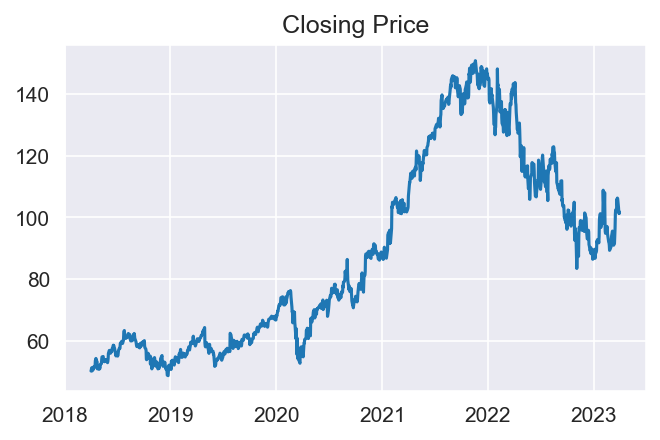

In [57]:
#overview of closing price before calculation DMA
sns.set_style('darkgrid')
plt.figure(figsize=(5,3), dpi = 150)
plt.title('Closing Price')
plt.plot(df['Close'])

In [58]:
#Calculate 50DMA
df['fiftyDMA'] = df['Close'].rolling(50).mean()

In [59]:
#Calculate 200DMA
df['thDMA'] = df['Close'].rolling(200).mean()

In [60]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,87.911154,88.926791,86.970010,87.964426,3.069655e+07,0.0,0.015886,88.484296,90.036529
std,30.575536,30.877932,30.234337,30.543871,1.329747e+07,0.0,0.563660,30.367759,29.851895
min,48.695000,50.176998,48.505501,48.811001,6.936000e+06,0.0,0.000000,52.442220,55.669353
25%,59.764250,60.209499,59.289499,59.779749,2.234500e+07,0.0,0.000000,59.895278,61.776036
50%,78.031998,79.293503,77.197502,78.362000,2.740600e+07,0.0,0.000000,77.338605,81.293216
75%,113.261749,114.805000,112.139000,113.317753,3.476325e+07,0.0,0.000000,113.750300,118.879604
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [61]:
#usuniecie kolumn
#df.drop(columns = ['50DMA','fDMA'], inplace = True)

In [62]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
Date,,,,,,,,,
2018-04-02 00:00:00-04:00,51.140999,51.740002,49.518501,50.323502,53608000,0.0,0.0,NaN,NaN
2018-04-03 00:00:00-04:00,50.695499,51.049500,49.703499,50.670502,45502000,0.0,0.0,NaN,NaN
2018-04-04 00:00:00-04:00,49.670502,51.435902,49.650002,51.257000,49694000,0.0,0.0,NaN,NaN
2018-04-05 00:00:00-04:00,52.066502,52.139500,51.006550,51.390499,27260000,0.0,0.0,NaN,NaN
2018-04-06 00:00:00-04:00,51.000000,51.570999,50.151501,50.352001,34928000,0.0,0.0,NaN,NaN


In [63]:
print('Nie bedzie pierwszych 20,50 i 200, bo brana jest z nich srednia')

Nie bedzie pierwszych 20,50 i 200, bo brana jest z nich srednia


In [64]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,fiftyDMA,thDMA
Date,,,,,,,,,
2023-03-24 00:00:00-04:00,105.739998,106.160004,104.739998,106.059998,25236200,0.0,0.0,97.025201,102.112513
2023-03-27 00:00:00-04:00,105.320000,105.400002,102.629997,103.059998,25393400,0.0,0.0,97.248200,102.041623
2023-03-28 00:00:00-04:00,103.000000,103.000000,100.279999,101.360001,24913500,0.0,0.0,97.419400,101.973833
2023-03-29 00:00:00-04:00,102.720001,102.820000,101.029999,101.900002,26148300,0.0,0.0,97.614200,101.926195
2023-03-30 00:00:00-04:00,101.440002,101.610001,100.290001,101.320000,24998100,0.0,0.0,97.805000,101.898413


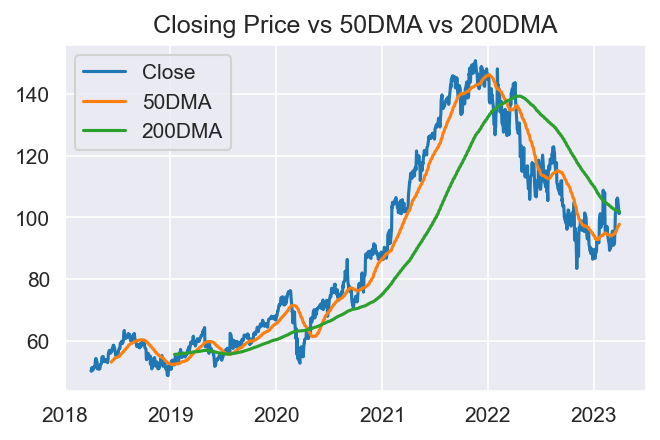

In [65]:
#overview of closing price before calculation DMA
sns.set_style('darkgrid')
plt.figure(figsize=(5,3), dpi = 150)
plt.title('Closing Price vs 50DMA vs 200DMA')
plt.plot(df['Close'], label = 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()
plt.show()

# Inferences from the atove graph.
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving.
2. If the closing price is above the the 50DMA or 200DMA, it is usually on the uptrcnd or bullish.
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downd trend.
4. Every point where 50DMA and 2O0DMA intersect, the market usually reverses its trend ( High -> Low | Low -> High )
5. The huge dip at the March 2020, indicates the Covid 19 market crash.

<AxesSubplot: >

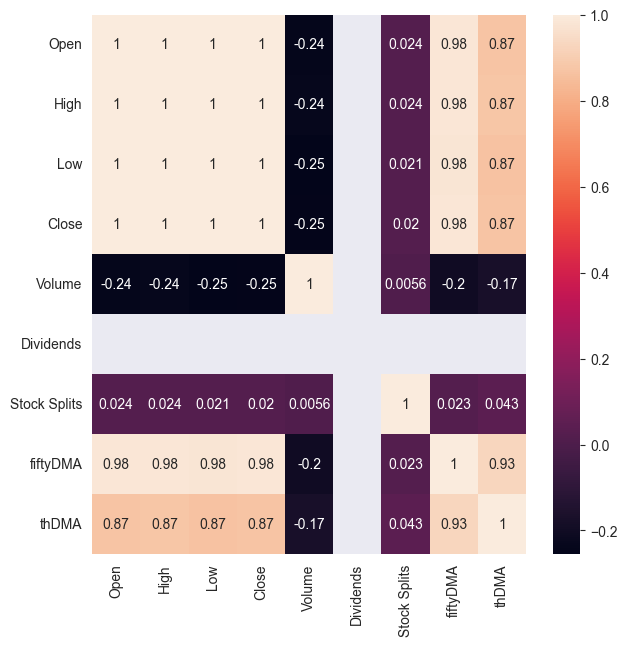

In [66]:
# Analyse correlation between each variables
plt.figure(figsize=(7,7),dpi = 100) 
sns.heatmap(df.corr(),annot = True )

# Inferences from the heataap.
1. Closing price has very High correlation with almost all the variables except the volume.
2. There is strong multl collinearity between the variables as well.

<AxesSubplot: title={'center': 'Distplot 50DMA'}, xlabel='fiftyDMA', ylabel='Density'>

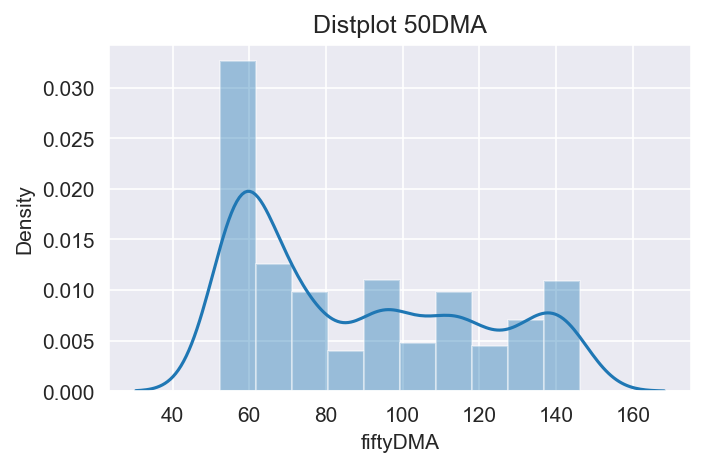

In [73]:
#plot distplot od 50DMA
sns.set_style('darkgrid')
plt.figure(figsize=(5,3), dpi = 150)
plt.title('Distplot 50DMA')
sns.distplot(df['fiftyDMA'], label ='50DMA')

<AxesSubplot: title={'center': 'Distplot Close'}, xlabel='Close', ylabel='Density'>

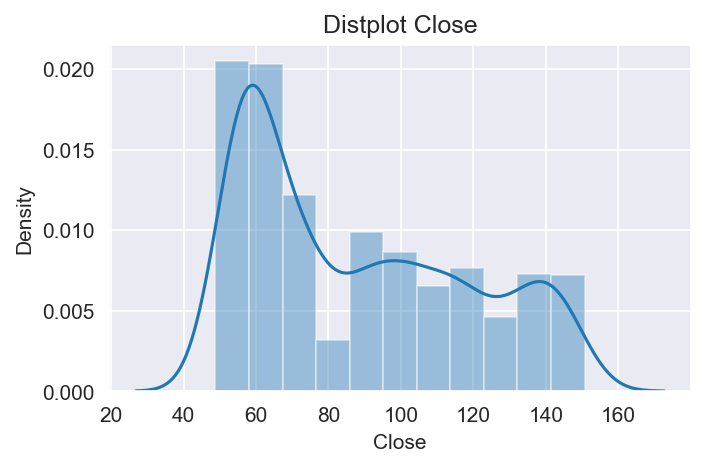

In [72]:
#plot distplot of close prcies
sns.set_style('darkgrid')
plt.figure(figsize=(5,3), dpi = 150)
plt.title('Distplot Close')
sns.distplot(df['Close'], label ='Close')

In [69]:
import statsmodels.formula.api as smf

In [70]:
model = smf.ols(formula = 'Close ~ fiftyDMA', data = df)
model = model.fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 2.991e+04
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:24:41   Log-Likelihood:                -3879.1
No. Observations:                1210   AIC:                             7762.
Df Residuals:                    1208   BIC:                             7772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7579      0.529      5.209      0.000       1.719       3.797
fiftyDMA       0.9789      0.006    172.956      0.000       0.968       0.990
==============================================================================
Omnibus:                       63.218   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.609
Skew:                          -0.562   Prob(JB):                     1.71e-16
Kurtosis:                       3.422   Cond. No.                         288.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""